In [65]:
import pandas as p
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

In [2]:
dataset = p.read_csv("Downloads/mix.csv", sep = ";")

In [3]:
dataset

NSC                                             smiles    pKa  \
0     NSC_10232                                Fc1c(cccc1)OCC(=O)O   3.08   
1    NSC_102796                          c1cc(cc(c1OCCCC(=O)O)C)Cl   4.84   
2     NSC_10312                               Fc1ccc(c(F)c1)C(=O)O   3.58   
3     NSC_10319                                  Fc1c(cccc1)C(=O)O   3.27   
4     NSC_10320                                  Fc1cc(ccc1)C(=O)O   3.86   
5     NSC_10321                                  Fc1ccc(cc1)C(=O)O   4.14   
6    NSC_106449                                   C(=O)(O)CCC(=O)O   4.21   
7      NSC_1112                                      C1C(C1)C(=O)O   4.83   
8     NSC_11765                                    C(CC)(CC)C(=O)O   4.71   
9    NSC_120417                     c1ccccc1[C@@H](c1ccccc1)C(=O)O   3.94   
10    NSC_12096     c1(c(c(c(cc1C(=O)O)C(=O)O)C(=O)O)C(=O)O)C(=O)O   1.80   
11   NSC_125718                                    c1ccccc1CC(=O)O   4.31   
12   NSC_126584                                 Fc1cccc(F)c1C(=O)O   2.85   
13   NSC_132953                                          C(=O)(O)C   4.76   
14    NSC_13564                               c1cc(cc(c1C(=O)O)O)O   3.11   
15      NSC_141                                          BrCC(=O)O   2.89   
16    NSC_14190  O1[C@@]23[C@@H]4CC[C@]5(C(=C)C[C@]4([C@H]([C@@...   4.00   
17      NSC_142                                          ClCC(=O)O   2.87   
18    NSC_14285                                Clc1ccc(cc1)CC(=O)O   4.19   
19    NSC_14358                                Brc1ccc(cc1)CC(=O)O   4.19   
20   NSC_147400                            c1c(c(cc(c1C(=O)O)C)C)C   4.38   
21      NSC_149                                   c1c(cccc1)C(=O)O   4.19   
22    NSC_15042                               c1(c(cccc1)C(=O)O)Cl   2.89   
23   NSC_151909                         c1cccc2c1cc1ccccc1c2C(=O)O   3.65   
24    NSC_15310                             c1c(cccc1C(=O)O)C(=O)O   3.70   
25    NSC_15772                            c1cccc2c1c(ccc2)CC(=O)O   4.23   
26    NSC_15797                                O=Cc1ccc(cc1)C(=O)O   3.77   
27    NSC_16045                                  C(C)C(C)(C)C(=O)O   5.03   
28      NSC_166                                           OCC(=O)O   3.83   
29    NSC_16631                             c1(c(ccc(c1)C(=O)O)O)O   4.26   
..          ...                                                ...    ...   
341    NSC_8130                          c1(cc(cc(c1O)C)C)C(C)(C)C  12.04   
342    NSC_8204                                 c1cccc(c1C(=O)OC)O   9.87   
343   NSC_82996                                 O=Cc1ccc(c(c1)O)OC   8.89   
344    NSC_8464                              Clc1cc(ccc1O)C(C)(C)C   8.58   
345    NSC_8475                              c1cc(ccc1C(=O)OCCCC)O   8.47   
346    NSC_8477                             c1c(ccc(c1C)O)C(C)(C)C  10.59   
347    NSC_8510                                c1cc(ccc1C(=O)OCC)O   8.34   
348    NSC_8511                               c1cc(ccc1C(=O)OCCC)O   7.91   
349   NSC_85228                                              C(C)O  15.90   
350   NSC_85232                                                 CO  15.30   
351   NSC_85475                                 c1(cc(c(cc1)O)CO)C  10.15   
352   NSC_87078                                       Fc1cc(ccc1)O   9.21   
353    NSC_8768                                       c1c(cccc1O)C  10.09   
354   NSC_88303                              c1c(ccc(c1)O)C(F)(F)F   8.68   
355    NSC_8837                                           C(C)OCCO  14.80   
356    NSC_8873                                      c1c(cccc1O)CC   9.90   
357    NSC_8885                                   c1c(cc(cc1O)C)CC  10.10   
358    NSC_8895                                c1c(c(ccc1CC=C)O)OC  10.19   
359   NSC_91527         c1(ccc(cc1)[C@@H](c1ccc(cc1)O)c1ccccc1CO)O   9.65   
360    NSC_9230                                           OCC(O)CO  14.40   
361    N

In [8]:
dataset.describe()

pKa        H_ID          qH          qO         qOd
count  371.000000  371.000000  371.000000  371.000000  371.000000
mean     6.503881   17.859838    0.473013   -0.750591   -0.509098
std      3.604279    7.807258    0.014860    0.014849    0.048126
min      0.510000    5.000000    0.429287   -0.786837   -0.661997
25%      3.700000   14.000000    0.460489   -0.762620   -0.531205
50%      4.800000   17.000000    0.478824   -0.753064   -0.513323
75%      9.700000   20.000000    0.484448   -0.738481   -0.482494
max     17.600000   82.000000    0.500662   -0.709112   -0.380861

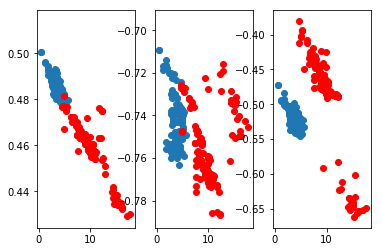

In [34]:
acids = dataset[dataset.acid==True]
alcohols = dataset[dataset.acid==False]
plt.subplot(1,3,1)
plt.scatter(acids.pKa, acids.qH)
plt.scatter(alcohols.pKa, alcohols.qH, c="red")
plt.subplot(1,3,2)
plt.scatter(acids.pKa, acids.qO)
plt.scatter(alcohols.pKa, alcohols.qO, c="r")
plt.subplot(1,3,3)
plt.scatter(acids.pKa, acids.qOd)
plt.scatter(alcohols.pKa, alcohols.qOd, color="red")
plt.show()

In [50]:
regr = linear_model.LinearRegression()
regr.fit(dataset.iloc[:,4:9],dataset[["pKa"]])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

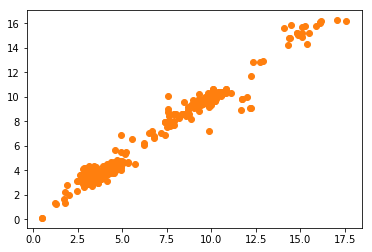

In [52]:
plt.scatter(dataset["pKa"], regr.predict(dataset.iloc[:,4:9]))
plt.show()

In [53]:
regr.score(dataset.iloc[:,4:9],dataset[["pKa"]])

0.9708817971616116

In [60]:
rf = RandomForestRegressor()
rf.fit(dataset.iloc[:,4:9],dataset["pKa"])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

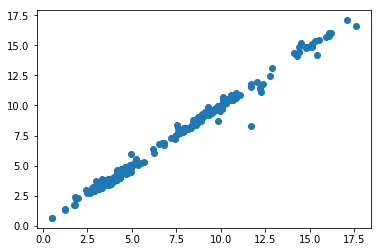

In [63]:
plt.scatter(dataset["pKa"], rf.predict(dataset.iloc[:,4:9]))
plt.show()

In [62]:
rf.score(dataset.iloc[:,4:9],dataset[["pKa"]])

0.99346484000632207

In [74]:
nn = MLPRegressor(max_iter=10000,learning_rate_init=0.01)
nn.fit(dataset.iloc[:,4:9],dataset["pKa"])

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.01, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

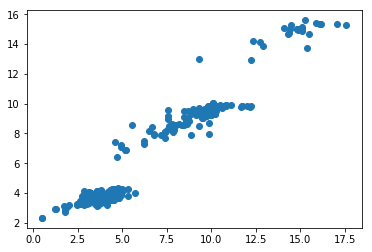

In [75]:
plt.scatter(dataset["pKa"], nn.predict(dataset.iloc[:,4:9]))
plt.show()

In [70]:
nn.score(dataset.iloc[:,4:9],dataset[["pKa"]])

0.94668430220877675